In [1]:
import cv2,os

data_path='Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)

In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

target=np_utils.to_categorical(target)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [5]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
print(train_data.shape, test_data.shape)

(1238, 100, 100, 1) (138, 100, 100, 1)


In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6565 - accuracy: 0.6232

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 16s 492ms/step - loss: 0.6565 - accuracy: 0.6232 - val_loss: 0.6057 - val_accuracy: 0.6452
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.4589 - accuracy: 0.7859

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 15s 485ms/step - loss: 0.4589 - accuracy: 0.7859 - val_loss: 0.3727 - val_accuracy: 0.8387
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.2726 - accuracy: 0.9030

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 15s 482ms/step - loss: 0.2726 - accuracy: 0.9030 - val_loss: 0.2566 - val_accuracy: 0.8831
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.9333

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 15s 488ms/step - loss: 0.1927 - accuracy: 0.9333 - val_loss: 0.2268 - val_accuracy: 0.9113
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9354

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 15s 483ms/step - loss: 0.1685 - accuracy: 0.9354 - val_loss: 0.1671 - val_accuracy: 0.9395
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9596

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 15s 480ms/step - loss: 0.1118 - accuracy: 0.9596 - val_loss: 0.1669 - val_accuracy: 0.9395
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9737

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


31/31 [==============================] - 15s 491ms/step - loss: 0.0838 - accuracy: 0.9737 - val_loss: 0.1401 - val_accuracy: 0.9395
Epoch 8/20
31/31 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9818

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


31/31 [==============================] - 15s 482ms/step - loss: 0.0581 - accuracy: 0.9818 - val_loss: 0.1354 - val_accuracy: 0.9476
Epoch 9/20
31/31 [==============================] - 14s 446ms/step - loss: 0.0441 - accuracy: 0.9848 - val_loss: 0.2958 - val_accuracy: 0.9113
Epoch 10/20
31/31 [==============================] - 14s 449ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1709 - val_accuracy: 0.9556
Epoch 11/20
31/31 [==============================] - 14s 460ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.2062 - val_accuracy: 0.9355
Epoch 12/20
31/31 [==============================] - 14s 448ms/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.2472 - val_accuracy: 0.9355
Epoch 13/20
31/31 [==============================] - 14s 443ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.1562 - val_accuracy: 0.9476
Epoch 14/20
31/31 [==============================] - 14s 439ms/step - loss: 0.0349 - accuracy: 0.9879 - val_loss: 0.2219 - val_accuracy: 0.9234
Epoch

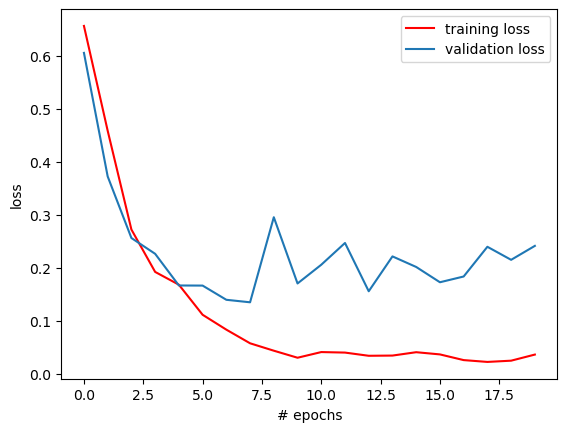

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

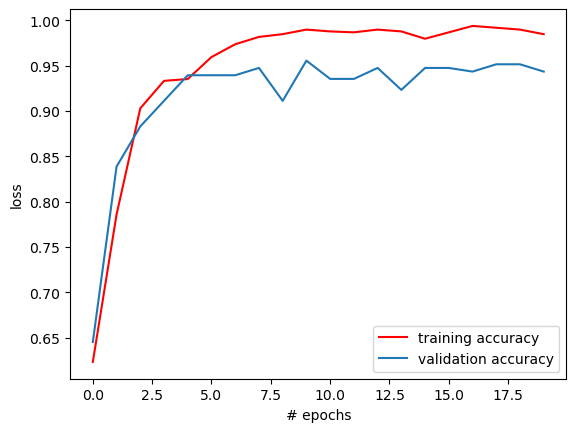

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 117ms/step - loss: 0.1100 - accuracy: 0.9710
[0.11001686751842499, 0.9710144996643066]
